In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from pandas.plotting import autocorrelation_plot, lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm


from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima_model import ARMA

matplotlib.rcParams['figure.figsize'] = (12, 5)

In [3]:
file = "data/s&p500.csv"
df = pd.read_csv(file)

In [4]:
df.head()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NaN
1,1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NaN
2,1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NaN
3,1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,NaN
4,1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,NaN


In [5]:
df['Date']= pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [11]:
df.index

DatetimeIndex(['1871-01-01', '1871-02-01', '1871-03-01', '1871-04-01',
               '1871-05-01', '1871-06-01', '1871-07-01', '1871-08-01',
               '1871-09-01', '1871-10-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Date', length=1768, freq=None)

In [6]:
df.head()

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NaN
1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NaN
1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NaN
1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,NaN
1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,NaN


**Check for Randomness**

<AxesSubplot:title={'center':'lag plot'}, xlabel='y(t)', ylabel='y(t + 4)'>

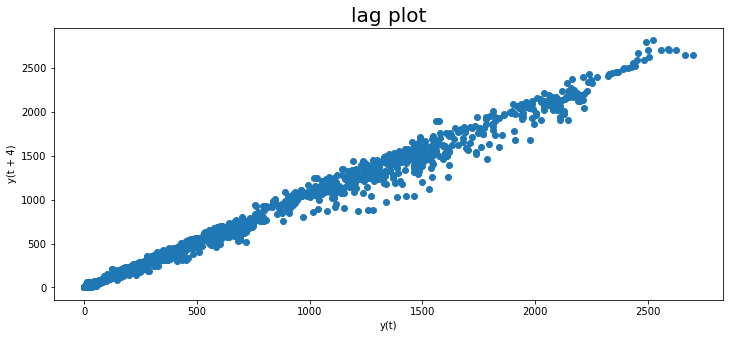

In [7]:
plt.title("lag plot", size=20)
lag_plot(df, lag=4, )

In [ ]:
# the plot some specific shape, this indicate the series did not occur by random means.

<AxesSubplot:title={'center':'Autocorrelation plot'}, xlabel='Lag', ylabel='Autocorrelation'>

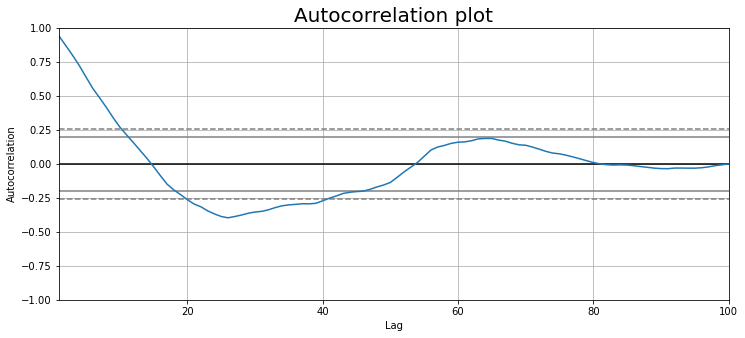

In [17]:
plt.title("Autocorrelation plot", size=20)
autocorrelation_plot(df.loc['2005-01-12':'2013-05-15']['SP500'])

**ACF & PACF**

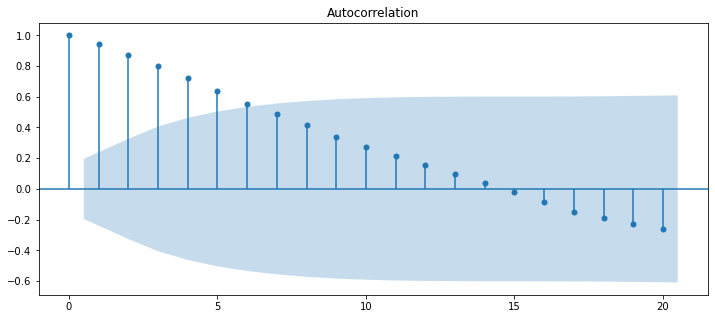

In [18]:
plot_acf(df.loc['2005-01-12':'2013-05-15']['SP500'],);

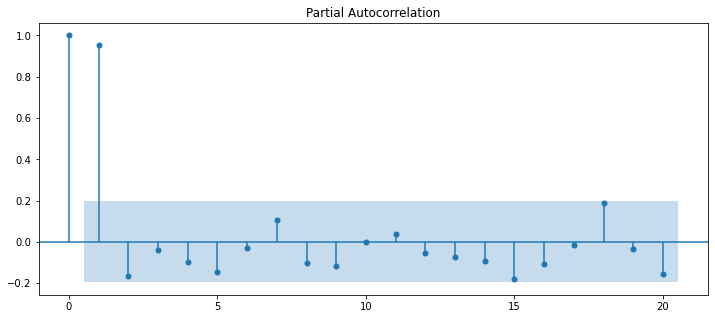

In [19]:
plot_pacf(df.loc['2005-01-12':'2013-05-15']['SP500']);

In [25]:
df.isna().sum()

SP500                     0
Dividend                  1
Earnings                  4
Consumer Price Index      0
Long Interest Rate        0
Real Price                0
Real Dividend             1
Real Earnings             4
PE10                    120
dtype: int64

**Autoregressive model**

In [28]:
#monthly observations
sp = df[['SP500', 'Consumer Price Index']]
sp_week= sp.resample('W')['SP500'].sum()

<AxesSubplot:xlabel='Date'>

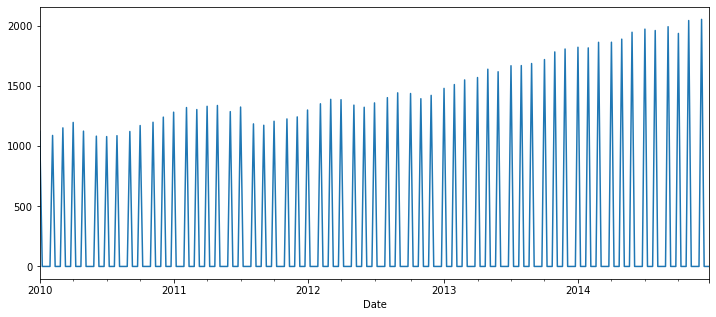

In [35]:
sp_week1014= sp_week.loc['2010':'2014']
sp_week1014.plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

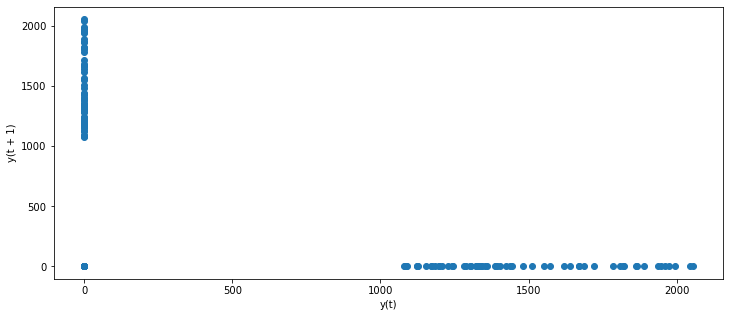

In [36]:
lag_plot(sp_week1014,)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

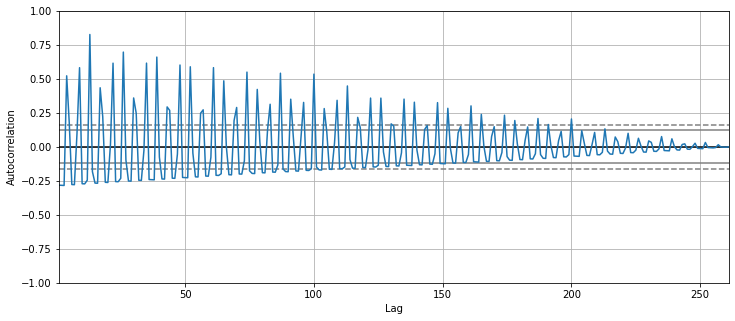

In [37]:
autocorrelation_plot(sp_week1014)

In [38]:
seasonalities= sm.tsa.seasonal_decompose(sp_week1014)

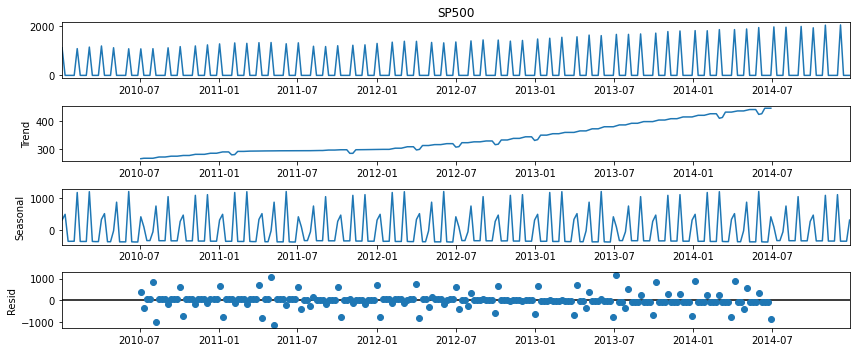

In [39]:
seasonalities.plot();

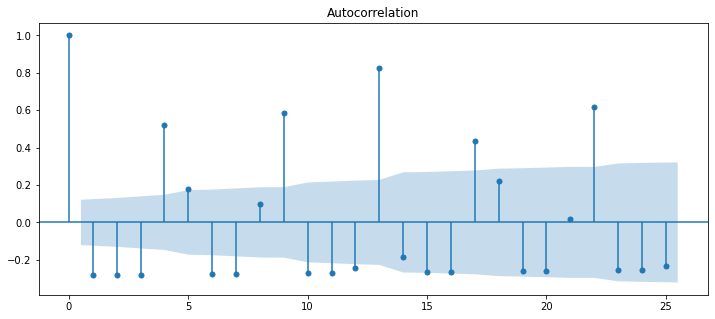

In [40]:
plot_acf(sp_week1014);

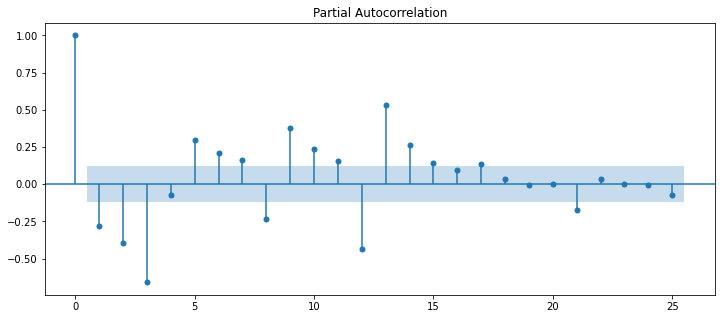

In [41]:
plot_pacf(sp_week1014);

In [49]:
# applying AR model

ARmodel= AutoReg(sp_week1014, 4)
ARresults = model.fit(cov_type='HC0')

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [50]:
ARresults.summary()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  SP500   No. Observations:                  261
Model:                     AutoReg(4)   Log Likelihood               -1918.406
Method:               Conditional MLE   S.D. of innovations            422.283
Date:                Sun, 29 Aug 2021   AIC                             12.138
Time:                        10:06:42   BIC                             12.221
Sample:                    01-31-2010   HQIC                            12.171
                         - 12-28-2014                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1065.7424     91.868     11.601      0.000     885.684    1245.801
SP500.L1      -0.6943      0.063    -11.017      0.000      -0.818      -0.571
SP500.L2      -0.6943      0.063    -11.017      0.000      -0.818      -0.571
SP500.L3      -0.6943      0.063    -11.017      0.000      -0.818      -0.571
SP500.L4      -0.0583      0.099     -0.589      0.556      -0.252       0.136
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1233           -1.1142j            1.1210           -0.2325
AR.2            0.1233           +1.1142j            1.1210            0.2325
AR.3           -1.2518           -0.0000j            1.2518           -0.5000
AR.4          -10.9029           -0.0000j           10.9029           -0.5000
-----------------------------------------------------------------------------
"""

In [47]:
sp_week1014.shape

(261,)

Text(0.5, 1.0, 'Auto-regressive model')

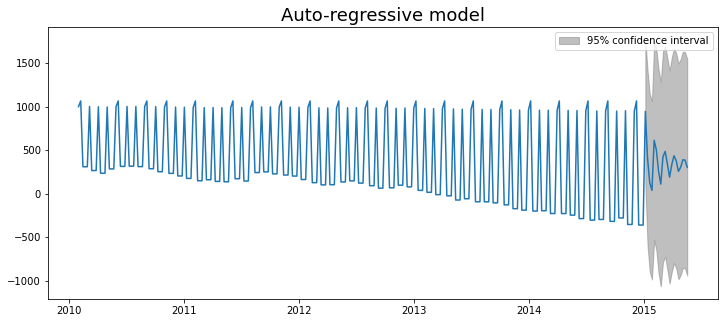

In [57]:
# plot prediction

ARresults.plot_predict(0, 280);
plt.title("Auto-regressive model", size=18)

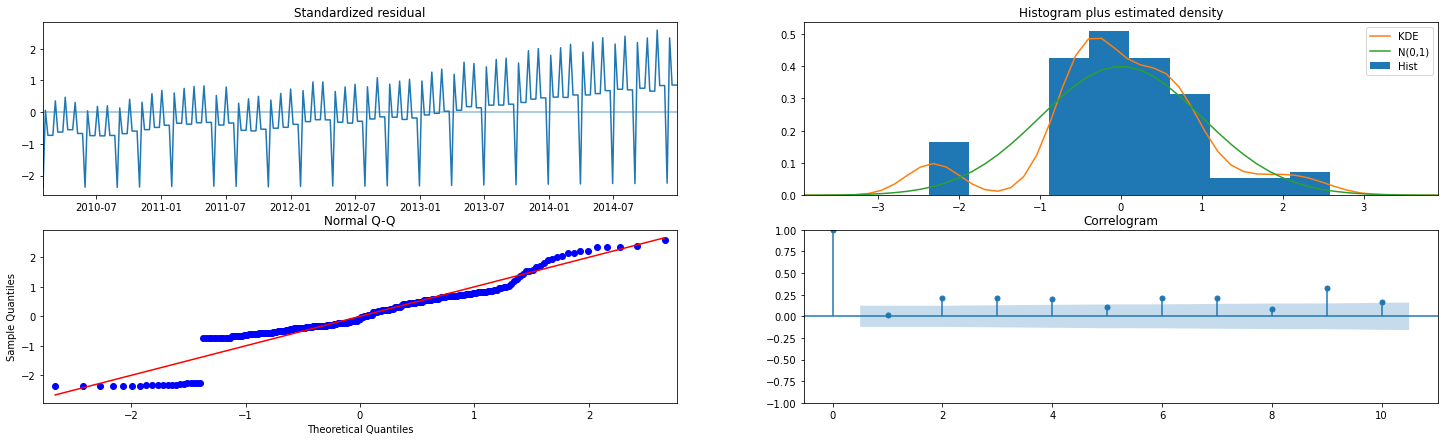

In [63]:
fig = plt.figure(figsize=(25, 7))
ARresults.plot_diagnostics(fig=fig);

In [55]:
MA_model= ARMA(sp_week1014, order=(0, 6))
MA_results= MA_model.fit()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [56]:
MA_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  SP500   No. Observations:                  261
Model:                     ARMA(0, 6)   Log Likelihood               -1950.824
Method:                       css-mle   S.D. of innovations            424.026
Date:                Sun, 29 Aug 2021   AIC                           3917.649
Time:                        10:09:16   BIC                           3946.165
Sample:                    01-03-2010   HQIC                          3929.111
                         - 12-28-2014                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         338.6692     13.251     25.558      0.000     312.698     364.640
ma.L1.SP500    -0.6561      0.067     -9.844      0.000      -0.787      -0.525
ma.L2.SP500    -0.0810      0.074     -1.092      0.275      -0.226       0.064
ma.L3.SP500    -0.0625      0.088     -0.712      0.476      -0.234       0.109
ma.L4.SP500     0.6631      0.072      9.259      0.000       0.523       0.803
ma.L5.SP500    -0.1326      0.076     -1.741      0.082      -0.282       0.017
ma.L6.SP500    -0.2277      0.066     -3.475      0.001      -0.356      -0.099
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.8027           -0.6920j            1.0598           -0.1132
MA.2            0.8027           +0.6920j            1.0598            0.1132
MA.3            1.3636           -0.0000j            1.3636           -0.0000
MA.4           -0.6909           -0.9188j            1.1496           -0.3526
MA.5           -0.6909           +0.9188j            1.1496            0.3526
MA.6           -2.1693           -0.0000j            2.1693           -0.5000
-----------------------------------------------------------------------------
"""

In [64]:
ARresults.predict(dynamic= True)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Date
2010-01-03            NaN
2010-01-10            NaN
2010-01-17            NaN
2010-01-24            NaN
2010-01-31    1000.227842
                 ...     
2014-11-30     339.262353
2014-12-07     339.262353
2014-12-14     339.262353
2014-12-21     339.262353
2014-12-28     339.262353
Freq: W-SUN, Length: 261, dtype: float64

Text(0.5, 1.0, 'MA model')

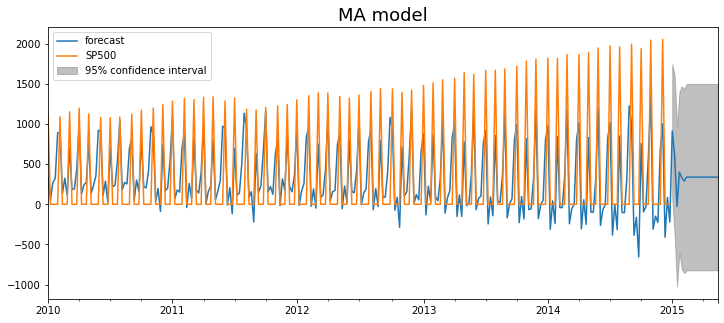

In [59]:
MA_results.plot_predict(0, 280);
plt.title('MA model', size=18)

In [60]:
MA_results.predict(dynamic=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Date
2010-01-03    913.043293
2010-01-10    613.831497
2010-01-17    -26.559554
2010-01-24    402.318587
2010-01-31    329.389349
                 ...    
2014-11-30    338.669195
2014-12-07    338.669195
2014-12-14    338.669195
2014-12-21    338.669195
2014-12-28    338.669195
Freq: W-SUN, Length: 261, dtype: float64